In [1]:

from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
# Reading data
trainDf = pd.read_csv ('data/ML-CUP20-TR.csv')
colnames=trainDf.columns.values
trainDf=pd.DataFrame(minmax_scale(trainDf, feature_range=(-1,1), axis=0))
#trainDf = pd.DataFrame(transformer.transform(trainDf.values))
trainDf.columns=colnames

# Spilitting the targets and input features
x_train = trainDf.iloc[:,:-2].to_numpy()
y_train = trainDf.iloc[:,[10,11]].to_numpy()


### Using Multioutput Regression

In [3]:
svr = svm.SVR(kernel='rbf',C=0.1, epsilon=0.1)
SVRegressor = MultiOutputRegressor(svr, n_jobs=1)
cv = KFold(n_splits=4, random_state=1)


/opt/anaconda3/envs/mlPisa2020/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [4]:
train_sizes, train_scores, test_scores = learning_curve(SVRegressor, x_train, y_train,scoring='neg_mean_squared_error', cv=cv, n_jobs=4)


In [5]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

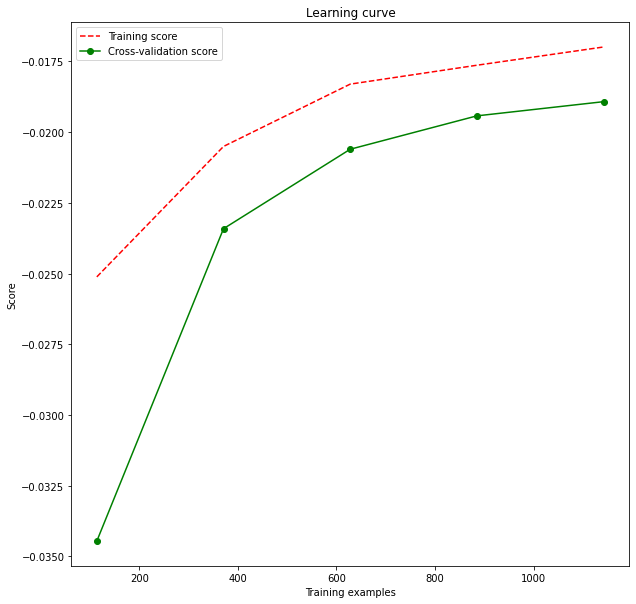

In [6]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_scores_mean, '--', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Score")                     
plt.legend(loc="best")
plt.show()

### Using RegressorChain


In [7]:
from sklearn.multioutput import RegressorChain
from sklearn.model_selection import learning_curve


In [8]:
model = svm.SVR(kernel='rbf',C=0.1, epsilon=0.1)
wrapper = RegressorChain(model)
cv = KFold(n_splits=4, random_state=1)

# evaluate the model and collect the scores
train_sizes, train_scores, test_scores = learning_curve(wrapper, x_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)


/opt/anaconda3/envs/mlPisa2020/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [9]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

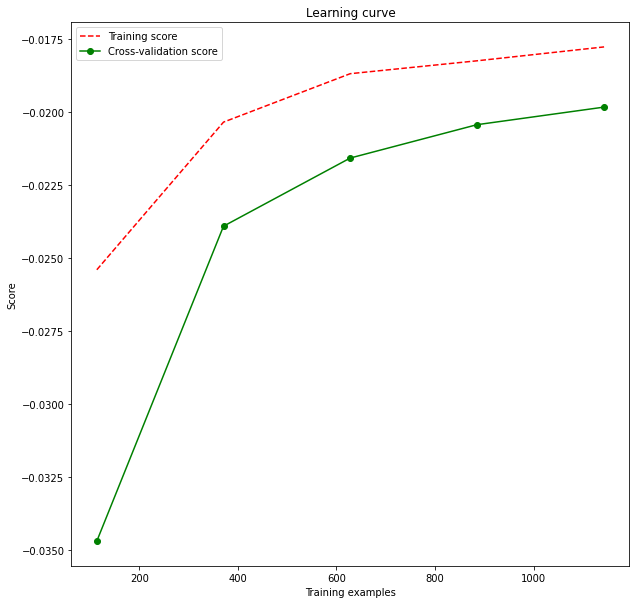

In [10]:
plt.subplots(1, figsize=(10,10))
plt.plot(train_sizes, train_scores_mean, '--', color="r",label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Cross-validation score")
plt.title("Learning curve")
plt.xlabel("Training examples")
plt.ylabel("Score")                     
plt.legend(loc="best")
plt.show()


In [10]:
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
import pandas as pd
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
trainDf = pd.read_csv ('data/ML-CUP20-TR.csv')
dataset = trainDf.to_numpy()

X = trainDf.iloc[:,:-2].to_numpy()
y = trainDf.iloc[:,[10,11]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [13]:
decisionTReg = DecisionTreeRegressor(random_state=0)
chain = RegressorChain(base_estimator=decisionTReg, order=[0,1]).fit(X_train, y_train)
testScore = chain.score(X_test, y_test)
trainScore = chain.score(X_train, y_train)
print("Test Score:", testScore)
print("Train Score:", trainScore)

Test Score: 0.8484177550644535
Train Score: 1.0


### Using Multioutput Regression

In [17]:
param_grid = {"base_estimator__criterion": ["mse", "mae","poisson","friedman_mse"],
              "base_estimator__min_samples_split": [10, 20, 40,'best'],
              "base_estimator__max_depth": [2, 6, 8],
              "base_estimator__min_samples_leaf": [20, 40, 100],
              "base_estimator__max_leaf_nodes": [5, 20, 100]
              }

In [18]:
grid_cv_dtm = GridSearchCV(chain, param_grid, cv=5, n_jobs=-1,verbose=1)

grid_cv_dtm.fit(X,y) # I fitted on the data without splitting to tr and ts

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 828 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=RegressorChain(base_estimator=DecisionTreeRegressor(random_state=0),
                                      order=[0, 1]),
             n_jobs=-1,
             param_grid={'base_estimator__criterion': ['mse', 'mae', 'poisson',
                                                       'friedman_mse'],
                         'base_estimator__max_depth': [2, 6, 8],
                         'base_estimator__max_leaf_nodes': [5, 20, 100],
                         'base_estimator__min_samples_leaf': [20, 40, 100],
                         'base_estimator__min_samples_split': [10, 20, 40,
                                                               'best']},
             verbose=1)

In [19]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.8693620266976655
Best Hyperparameters::
{'base_estimator__criterion': 'mae', 'base_estimator__max_depth': 8, 'base_estimator__max_leaf_nodes': 100, 'base_estimator__min_samples_leaf': 20, 'base_estimator__min_samples_split': 10}


In [20]:

extraTReg =ExtraTreeRegressor(random_state=0)
chain = RegressorChain(base_estimator=extraTReg, order=[0,1]).fit(X_train, y_train)
testScore = chain.score(X_test, y_test)
trainScore = chain.score(X_train, y_train)
print("Test Score:", testScore)
print("Train Score:", trainScore)



Test Score: 0.8076509756796031
Train Score: 1.0


## Pipeline Automation

In [31]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, r2_score

In [22]:
X = trainDf.iloc[:,:-2].to_numpy()
y = trainDf.iloc[:,[10,11]].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



In [23]:
best_acc = 0.0
best_clf = 0
best_gs = ''

In [24]:

pipe_dtR = Pipeline(steps = [('scale', StandardScaler()),
                             ('estimator', RegressorChain(DecisionTreeRegressor(random_state=0), order=[0,1]))])


pipe_dtR_pca = Pipeline(steps = [('scale', StandardScaler()),
                             ('pca', PCA(n_components=2)),
                             ('estimator', RegressorChain(DecisionTreeRegressor(random_state=0), order=[0,1]))])

pipe_etR = Pipeline(steps = [('scale', StandardScaler()),
                             ('estimator', RegressorChain(ExtraTreeRegressor(random_state=0), order=[0,1]))])

pipe_etR_pca = Pipeline(steps = [('scale', StandardScaler()),
                                ('pca', PCA(n_components=2)),       
                                ('estimator', RegressorChain(ExtraTreeRegressor(random_state=0), order=[0,1]))])
                                
pipe_knN = Pipeline(steps = [('scale', StandardScaler()),
                             ('estimator', RegressorChain(KNeighborsRegressor(n_neighbors=4), order=[0,1]))])

pipe_knN_pca = Pipeline(steps = [('scale', StandardScaler()),
                             ('pca', PCA(n_components=2)),
                             ('estimator', RegressorChain(KNeighborsRegressor(n_neighbors=4), order=[0,1]))])




In [25]:

param_grid_dtR = {
    'estimator__base_estimator__criterion': ['mse', 'mae','poisson','friedman_mse'],
    'estimator__base_estimator__min_samples_split': [10, 20, 40,'best'],
    'estimator__base_estimator__max_depth': [2, 6, 8],
    'estimator__base_estimator__min_samples_leaf': [20, 40, 100],
    'estimator__base_estimator__max_leaf_nodes': [5, 20, 100]
    }   


param_grid_etR = {
              'estimator__base_estimator__criterion': ['mse', 'mae','poisson','friedman_mse'], 
              'estimator__base_estimator__min_samples_split': [10, 20, 40,'best'],
              'estimator__base_estimator__max_depth': [2, 6, 8],
              'estimator__base_estimator__min_samples_leaf': [20, 40, 100],
              'estimator__base_estimator__max_leaf_nodes': [5, 20, 100],
              }

param_grid_knR = {
          'estimator__base_estimator__n_neighbors':[5,6,7,8,9,10],    # KNeighbot Regressor
          'estimator__base_estimator__leaf_size':[1,2,3,5],
          'estimator__base_estimator__weights':['uniform', 'distance'],
          'estimator__base_estimator__algorithm':['auto', 'ball_tree','kd_tree','brute']}
    



In [26]:
gs_dtR = GridSearchCV(pipe_dtR, param_grid_dtR, scoring='neg_mean_squared_error', cv=10, verbose =1,
                    return_train_score=True,n_jobs=-1)  
gs_dtR_pca = GridSearchCV(pipe_dtR_pca, param_grid_dtR, scoring='neg_mean_squared_error', cv=10, verbose =1,
                    return_train_score=True, n_jobs=-1)  

gs_etR = GridSearchCV(pipe_etR, param_grid_etR, scoring='neg_mean_squared_error', cv=10, verbose =1,
                    return_train_score=True,n_jobs=-1)  
gs_etR_pca = GridSearchCV(pipe_etR_pca, param_grid_etR, scoring='neg_mean_squared_error', cv=10, verbose =1,
                    return_train_score=True,n_jobs=-1)  

gs_knN = GridSearchCV(pipe_knN, param_grid_knR, scoring='neg_mean_squared_error', cv=10, verbose =1,
                    return_train_score=True,n_jobs=-1)  
gs_knN_pca = GridSearchCV(pipe_knN_pca, param_grid_knR, scoring='neg_mean_squared_error', cv=10, verbose =1,
                    return_train_score=True,n_jobs=-1)  





In [27]:
best_acc = 0.0
best_clf = 0
best_gs = ''

besttestScore = 0

In [29]:

grids = [gs_dtR, gs_dtR_pca, gs_etR, gs_etR_pca, gs_knN, gs_knN_pca]
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Decision Tree Regressor', 1: 'Decision Tree Regressor w/PCA', 
             2: 'Extra Tree Regressor', 3: 'Extra Tree Regressor w/PCA', 
             4: 'KNeighbot Regressor', 5: 'KNeighbot Regressor w/PCA'}

In [32]:

for idx, gs in enumerate(grids):
     print('\nEstimator: %s' % grid_dict[idx])	
     gs.fit(X_train, y_train)
     # best param
     print('Best params: %s' % gs.best_params_)
     
     # Best training data accuracy
     print('Best training accuracy: %.3f' % gs.best_score_)
     # Predict on test data with best params
     y_pred = gs.predict(X_test)
     
     # Test data accuracy of model with best params
     print('Test set accuracy score for best params: %.3f ' % r2_score(y_test, y_pred))
     # Track best (highest test accuracy) model
     if r2_score(y_test, y_pred) > best_acc:
         best_acc = r2_score(y_test, y_pred)
         best_gs = gs
         best_clf = idx
     

print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])




Estimator: Decision Tree Regressor
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1428 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best params: {'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 6, 'estimator__base_estimator__max_leaf_nodes': 100, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy: -20.976
Test set accuracy score for best params: 0.851 

Estimator: Decision Tree Regressor w/PCA
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1176 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   38.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best params: {'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 6, 'estimator__base_estimator__max_leaf_nodes': 100, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy: -12.998
Test set accuracy score for best params: 0.901 

Estimator: Extra Tree Regressor
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 4271 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   29.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best params: {'estimator__base_estimator__criterion': 'mse', 'estimator__base_estimator__max_depth': 8, 'estimator__base_estimator__max_leaf_nodes': 100, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy: -22.785
Test set accuracy score for best params: 0.842 

Estimator: Extra Tree Regressor w/PCA
Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2680 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:   24.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best params: {'estimator__base_estimator__criterion': 'mae', 'estimator__base_estimator__max_depth': 8, 'estimator__base_estimator__max_leaf_nodes': 20, 'estimator__base_estimator__min_samples_leaf': 20, 'estimator__base_estimator__min_samples_split': 10}
Best training accuracy: -27.843
Test set accuracy score for best params: 0.874 

Estimator: KNeighbot Regressor
Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 1664 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best params: {'estimator__base_estimator__algorithm': 'brute', 'estimator__base_estimator__leaf_size': 1, 'estimator__base_estimator__n_neighbors': 10, 'estimator__base_estimator__weights': 'distance'}
Best training accuracy: -7.115
Test set accuracy score for best params: 0.940 

Estimator: KNeighbot Regressor w/PCA
Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 600 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 1913 out of 1920 | elapsed:   33.2s remaining:    0.1s


Best params: {'estimator__base_estimator__algorithm': 'auto', 'estimator__base_estimator__leaf_size': 1, 'estimator__base_estimator__n_neighbors': 9, 'estimator__base_estimator__weights': 'uniform'}
Best training accuracy: -11.638
Test set accuracy score for best params: 0.906 

Classifier with best test set accuracy: KNeighbot Regressor


[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:   33.6s finished
